# Checking file structure :

In [3]:
import tensorflow as tf

In [4]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
"""# TPU configuration :

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
AUTO = tf.data.experimental.AUTOTUNE"""

## Fixing non-readable DCIM images issue :

In [2]:
# Fixing non-readable DCIM images issue :

! pip install python-gdcm
! pip install pylibjpeg pylibjpeg-libjpeg pydicom



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 13.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 3.4 MB/s eta 0:00:0000:0100:010m


In [4]:
# Checking current dir :
import os
INITIAL_PATH = os.getcwd()
print(INITIAL_PATH)


/kaggle/working


In [7]:
# Checking list of files in the current dir :
print(os.listdir())

['__notebook_source__.ipynb', 'baseline', 'baseline_3D_conv', 'state.db', '.virtual_documents']


In [ ]:
# Checking list of files in the input dir :
print(os.listdir('/kaggle/input'))

In [ ]:
# Checking list of files in the project dir :
print(os.listdir('/kaggle/input/rsna-2022-cervical-spine-fracture-detection'))

In [ ]:
# Checking list of files in the 'train_images' dir :
print(os.listdir('/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images')[:3])

In [5]:
# Checking structure of files in the sub-folder in train_images :
train_images_path = '/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/'
sample_subfolder_path = train_images_path + os.listdir(train_images_path)[10]
print(os.listdir(sample_subfolder_path))

['257.dcm', '240.dcm', '12.dcm', '210.dcm', '253.dcm', '120.dcm', '208.dcm', '141.dcm', '18.dcm', '9.dcm', '97.dcm', '95.dcm', '138.dcm', '249.dcm', '165.dcm', '244.dcm', '264.dcm', '124.dcm', '22.dcm', '116.dcm', '96.dcm', '25.dcm', '190.dcm', '234.dcm', '71.dcm', '241.dcm', '245.dcm', '39.dcm', '45.dcm', '14.dcm', '231.dcm', '11.dcm', '64.dcm', '44.dcm', '24.dcm', '248.dcm', '109.dcm', '131.dcm', '139.dcm', '133.dcm', '166.dcm', '61.dcm', '207.dcm', '276.dcm', '88.dcm', '147.dcm', '121.dcm', '160.dcm', '163.dcm', '201.dcm', '110.dcm', '103.dcm', '188.dcm', '172.dcm', '34.dcm', '113.dcm', '211.dcm', '174.dcm', '29.dcm', '23.dcm', '145.dcm', '273.dcm', '79.dcm', '194.dcm', '77.dcm', '146.dcm', '229.dcm', '225.dcm', '134.dcm', '117.dcm', '62.dcm', '170.dcm', '252.dcm', '92.dcm', '154.dcm', '41.dcm', '189.dcm', '274.dcm', '233.dcm', '84.dcm', '203.dcm', '132.dcm', '68.dcm', '209.dcm', '238.dcm', '35.dcm', '279.dcm', '59.dcm', '267.dcm', '275.dcm', '196.dcm', '86.dcm', '56.dcm', '168.dcm'

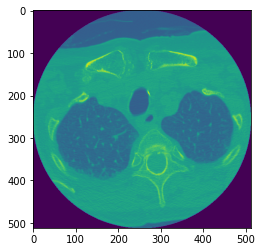

In [8]:
# Trying to open one of the images in the sample subfolder of train_images :

import pydicom as dicom

import pylibjpeg
import gdcm


import matplotlib.pylab as plt

sample_image_path = sample_subfolder_path + '/' + os.listdir(sample_subfolder_path)[0]

ds = dicom.dcmread(sample_image_path)

plt.imshow(ds.pixel_array)

In [ ]:
# Getting dimensions of this image :
ds.pixel_array.shape

In [ ]:
ds

In the informations above, we can see the 'Photometric Interpretation' value which is 'MONOCHROME2' : this means the images only have one channel.

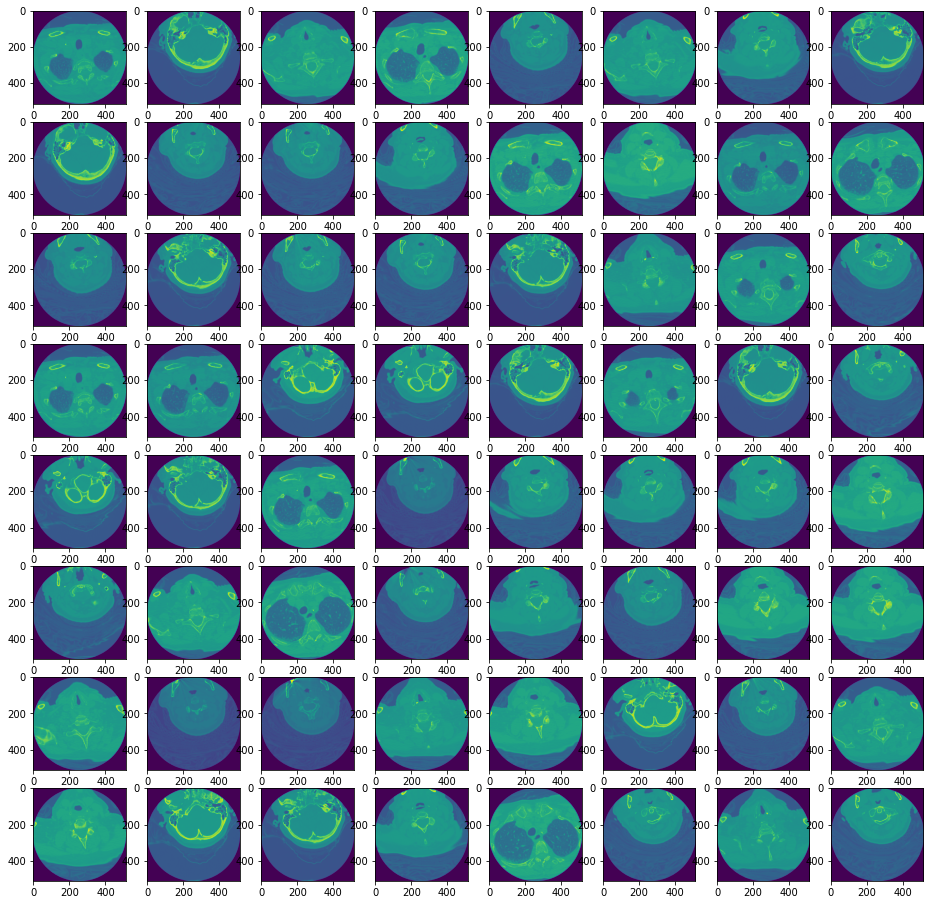

In [10]:
# Showing multiple images from this sample subfolder : 
plt.figure(figsize=(16,16))
for i in range(1,65):
    plt.subplot(8,8,i)
    i_path = sample_subfolder_path + '/' + os.listdir(sample_subfolder_path)[i]
    plt.imshow(dicom.dcmread(i_path).pixel_array)

### Fixing the issue of non-corresponding sequence of dicom images :

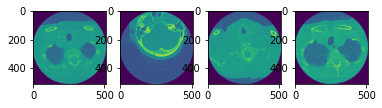

In [11]:
# Trying to get a sequence of 4 :

for i in range(1,5):
    plt.subplot(1,4,i)
    i_path = sample_subfolder_path + '/' + os.listdir(sample_subfolder_path)[i]
    plt.imshow(dicom.dcmread(i_path).pixel_array)

In [ ]:
# Checking the order of images in the subfolder :

os.listdir(sample_subfolder_path)

In [6]:
# Creating a function to sort all images by numerotation in their name :

def sort_dcm(list_of_dcm: list):
    copy_list = list_of_dcm.copy()
    return(sorted(copy_list, key= lambda x: float(x.strip('.dcm'))))

test_list = os.listdir(sample_subfolder_path)
print("test list : ")
print(test_list)

sorted_test_list = sort_dcm(test_list)
print("sorted test list : ")
print(sorted_test_list)

test list : 
['257.dcm', '240.dcm', '12.dcm', '210.dcm', '253.dcm', '120.dcm', '208.dcm', '141.dcm', '18.dcm', '9.dcm', '97.dcm', '95.dcm', '138.dcm', '249.dcm', '165.dcm', '244.dcm', '264.dcm', '124.dcm', '22.dcm', '116.dcm', '96.dcm', '25.dcm', '190.dcm', '234.dcm', '71.dcm', '241.dcm', '245.dcm', '39.dcm', '45.dcm', '14.dcm', '231.dcm', '11.dcm', '64.dcm', '44.dcm', '24.dcm', '248.dcm', '109.dcm', '131.dcm', '139.dcm', '133.dcm', '166.dcm', '61.dcm', '207.dcm', '276.dcm', '88.dcm', '147.dcm', '121.dcm', '160.dcm', '163.dcm', '201.dcm', '110.dcm', '103.dcm', '188.dcm', '172.dcm', '34.dcm', '113.dcm', '211.dcm', '174.dcm', '29.dcm', '23.dcm', '145.dcm', '273.dcm', '79.dcm', '194.dcm', '77.dcm', '146.dcm', '229.dcm', '225.dcm', '134.dcm', '117.dcm', '62.dcm', '170.dcm', '252.dcm', '92.dcm', '154.dcm', '41.dcm', '189.dcm', '274.dcm', '233.dcm', '84.dcm', '203.dcm', '132.dcm', '68.dcm', '209.dcm', '238.dcm', '35.dcm', '279.dcm', '59.dcm', '267.dcm', '275.dcm', '196.dcm', '86.dcm', '56.dc

### Showing a corresponding sequence of dcm images :

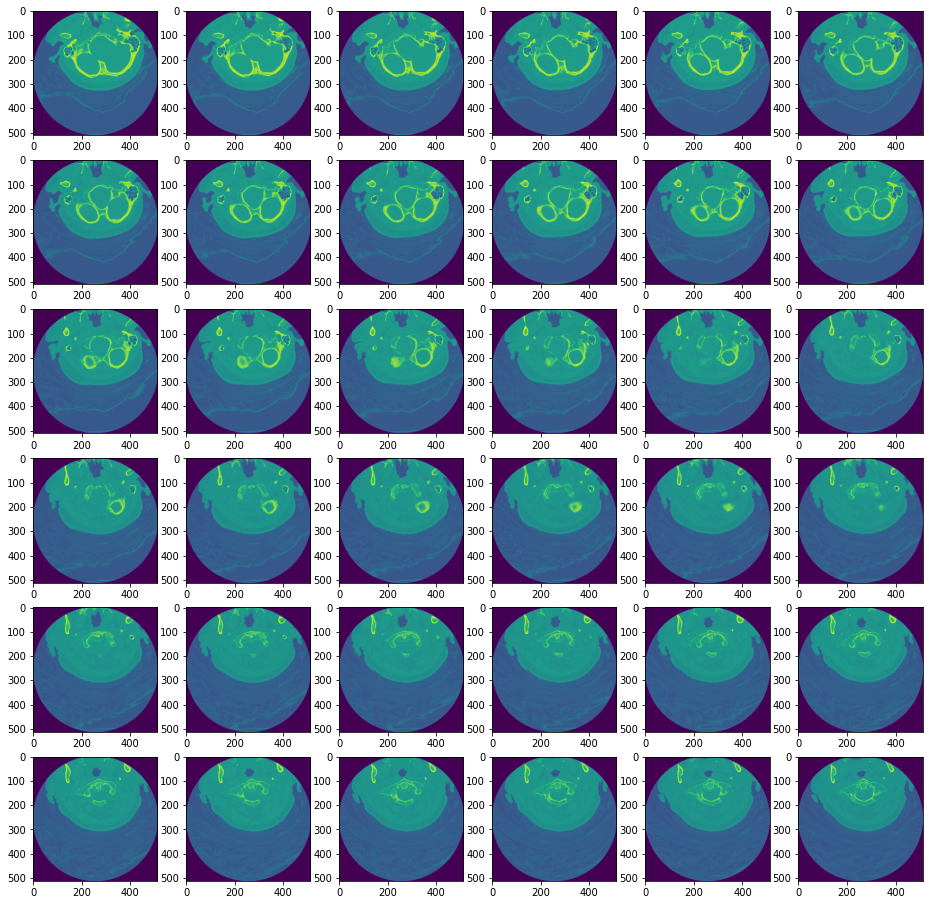

In [9]:
plt.figure(figsize=(16, 16))
for i in range(37, 73):
    plt.subplot(6, 6, i-36)
    image_path = sample_subfolder_path + '/' + sort_dcm(os.listdir(sample_subfolder_path))[i]
    plt.imshow(dicom.dcmread(image_path).pixel_array)

### Defining a way to detect and fix issues regarding compressed dicom files :

In [11]:
# Checking the associated csv file :
import pandas as pd
train_df = pd.read_csv('/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train.csv')
train_df


,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2014,1.2.826.0.1.3680043.21684,1,0,1,0,0,0,1,1
2015,1.2.826.0.1.3680043.4786,1,0,0,0,0,0,0,1
2016,1.2.826.0.1.3680043.14341,0,0,0,0,0,0,0,0
2017,1.2.826.0.1.3680043.12053,0,0,0,0,0,0,0,0


In [12]:
# Checking the bounding boxes csv file :
train_bounding_boxes = pd.read_csv('/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_bounding_boxes.csv')
train_bounding_boxes

,StudyInstanceUID,x,y,width,height,slice_number
0,1.2.826.0.1.3680043.10051,219.27715,216.71419,17.30440,20.38517,133
1,1.2.826.0.1.3680043.10051,221.56460,216.71419,17.87844,25.24362,134
2,1.2.826.0.1.3680043.10051,216.82151,221.62546,27.00959,26.37454,135
3,1.2.826.0.1.3680043.10051,214.49455,215.48637,27.92726,37.51363,136
4,1.2.826.0.1.3680043.10051,214.00000,215.48637,27.00000,43.51363,137
...,...,...,...,...,...,...
7212,1.2.826.0.1.3680043.9940,297.23186,115.53983,85.18228,66.52623,140
7213,1.2.826.0.1.3680043.9940,298.00000,117.00000,86.00000,61.00000,141
7214,1.2.826.0.1.3680043.9940,298.00000,119.00000,87.00000,58.00000,142
7215,1.2.826.0.1.3680043.9940,299.00000,120.00000,89.00000,56.00000,143


In [13]:
# Checking segmentation files :
segmentations_path = '/kaggle/input/rsna-2022-cervical-spine-fracture-detection/segmentations/'
print('Number of segmentations : ', len(os.listdir(segmentations_path)))
print(os.listdir(segmentations_path))

Number of segmentations :  87
['1.2.826.0.1.3680043.780.nii', '1.2.826.0.1.3680043.21321.nii', '1.2.826.0.1.3680043.6125.nii', '1.2.826.0.1.3680043.30067.nii', '1.2.826.0.1.3680043.12833.nii', '1.2.826.0.1.3680043.10921.nii', '1.2.826.0.1.3680043.30524.nii', '1.2.826.0.1.3680043.14267.nii', '1.2.826.0.1.3680043.27292.nii', '1.2.826.0.1.3680043.20647.nii', '1.2.826.0.1.3680043.32436.nii', '1.2.826.0.1.3680043.30640.nii', '1.2.826.0.1.3680043.18480.nii', '1.2.826.0.1.3680043.26110.nii', '1.2.826.0.1.3680043.3168.nii', '1.2.826.0.1.3680043.32280.nii', '1.2.826.0.1.3680043.23904.nii', '1.2.826.0.1.3680043.26068.nii', '1.2.826.0.1.3680043.18906.nii', '1.2.826.0.1.3680043.24606.nii', '1.2.826.0.1.3680043.28665.nii', '1.2.826.0.1.3680043.1542.nii', '1.2.826.0.1.3680043.24140.nii', '1.2.826.0.1.3680043.8330.nii', '1.2.826.0.1.3680043.4769.nii', '1.2.826.0.1.3680043.12281.nii', '1.2.826.0.1.3680043.5002.nii', '1.2.826.0.1.3680043.4202.nii', '1.2.826.0.1.3680043.6078.nii', '1.2.826.0.1.3680043.2

In [14]:
# Checking a sample segmentation file :
sample_segmentation_path = segmentations_path + os.listdir(segmentations_path)[0]

import nibabel as nib
img = nib.load(sample_segmentation_path)
print("Shape of the sample : ", img.shape)

Shape of the sample :  (512, 512, 195)


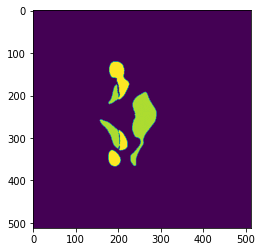

In [15]:
# Display a sample slice :
plt.imshow(img.get_fdata()[:,:,20])

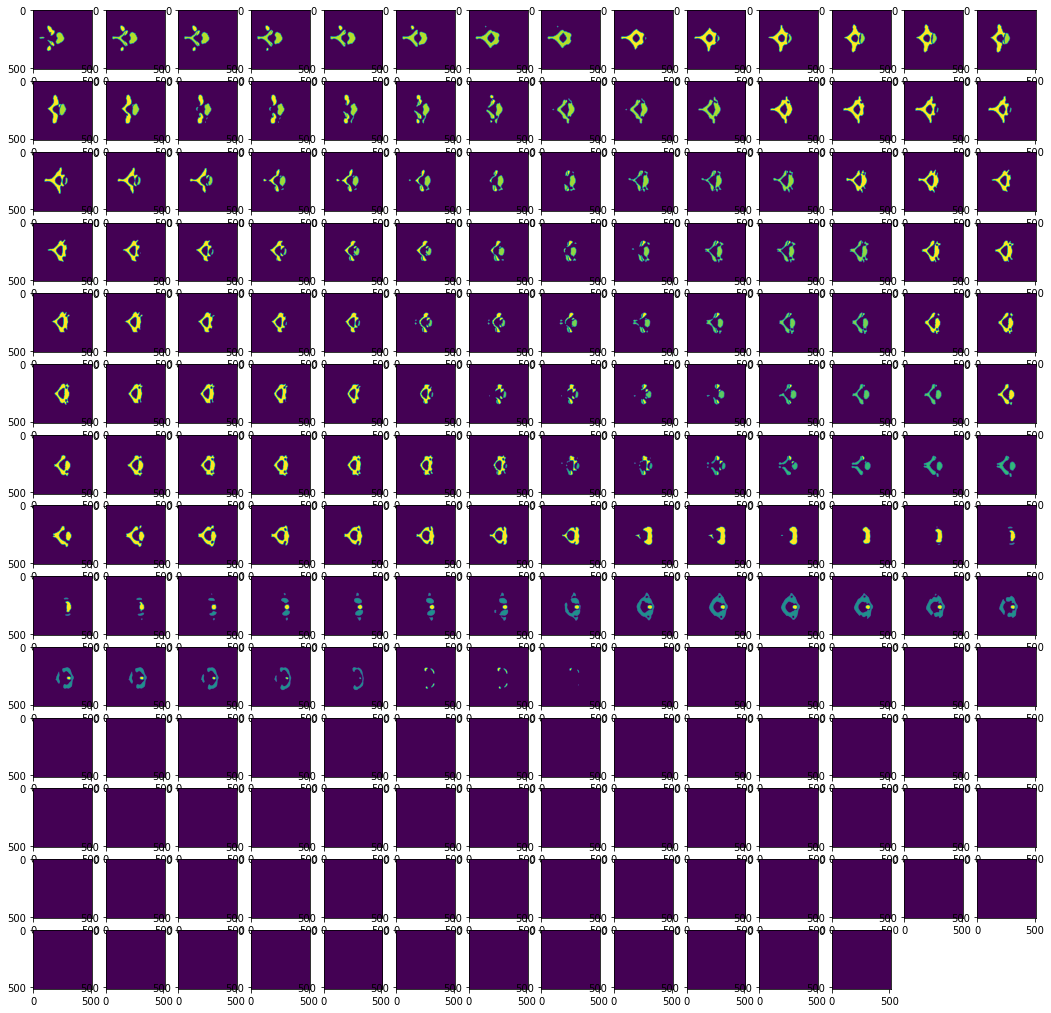

In [16]:
# Trying to display slices of the sample segmentation file :
plt.figure(figsize=(18,18))
for i in range(1,img.shape[2]):
    plt.subplot(14,14,i)
    plt.imshow(img.get_fdata()[:,:,i])

# Preprocessing :

In [ ]:
# Making every image well readable (some are JPEG compressed) using GDCM and/or pylibjpeg :


In [ ]:
# Fixing orientation issues segmentations/images :


# Trying to adapt from https://keras.io/examples/vision/3D_image_classification/

In [17]:
### Getting all scan paths into a unique list :

scan_paths_list = [os.path.join(train_images_path, x) for x in os.listdir(train_images_path)]

print("sample : ")
scan_paths_list[0:3]

sample : 


['/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17625',
 '/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.3850',
 '/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.2286']

In [18]:
### Trying to stack 2 slices together :

scan_sample_path = scan_paths_list[0]

slice_1_path = os.path.join(scan_sample_path, sort_dcm(os.listdir(scan_sample_path))[0])
slice_1 = dicom.dcmread(slice_1_path).pixel_array

slice_2_path = os.path.join(scan_sample_path, sort_dcm(os.listdir(scan_sample_path))[1])
slice_2 = dicom.dcmread(slice_2_path).pixel_array

print("Type of slice_1 : ", type(slice_1))
print("Shape of slice_1 : ", slice_1.shape)
print("Type of slice_2 : ", type(slice_2))
print("Shape of slice_2 : ", slice_2.shape)

import numpy as np
volume = np.stack([slice_1, slice_2], axis=-1)
print("Type of volume : ", type(volume))
print("Shape of volume : ", volume.shape)

Type of slice_1 :  <class 'numpy.ndarray'>
Shape of slice_1 :  (512, 512)
Type of slice_2 :  <class 'numpy.ndarray'>
Shape of slice_2 :  (512, 512)
Type of volume :  <class 'numpy.ndarray'>
Shape of volume :  (512, 512, 2)


In [19]:
### Stacking slices of a sample scan together as a volume :

def stacking_scan(path):
    list_of_slices = []
    nb_of_slices = len(os.listdir(path))
    for i in range(nb_of_slices):
        slice_path = os.path.join(path, sort_dcm(os.listdir(path))[i])
        slice_image = dicom.dcmread(slice_path).pixel_array
        list_of_slices.append(slice_image)
    volume = np.stack(list_of_slices, axis=-1)
    return(volume)

stacked_scan_sample = stacking_scan(scan_sample_path)
print("Type of stacked scan : ", type(stacked_scan_sample))
print("Shape of stacked_scan : ", stacked_scan_sample.shape)

Type of stacked scan :  <class 'numpy.ndarray'>
Shape of stacked_scan :  (512, 512, 239)


In [20]:
### Defining how to get each scan as stacked slices volumes : 

def stacking_all_scans(scan_paths: list):
    """Transform each scan from a folder of slices (.dcm files) to a volume (numpy array) and put them all in another array"""
    X = np.array([stacking_scan(path) for path in scan_paths_list])
    return(X)



In [21]:
### Creating a function to load dicom files, even if compressed :
import gdcm

def load_dicom(path: str):
    """Load a dicom file (.dcm) even if it is compressed."""
    try:
        file_as_array = dicom.dcmread(path).pixel_array
    except:
        decompressed_file = gdcm.ImageReader().SetFileName(path).Read()
        file_as_array = decompressed_file.pixel_array
    return(file_as_array)

In [22]:
# Set dimensions configuration :

desired_depth = 16
desired_width = 32
desired_height = 32

In [24]:
# Creating the preprocessing function including loading dicom normalization and resize :

def preprocessing_slice(slice_path: str):
    """Load dicom of a slice, normalize and resize it"""
    # Loading dicom :
    slice_array = load_dicom(slice_path)
    slice_array = slice_array.astype(np.uint8)
    
    # Normalization :
    min = -1000
    max = 400
    slice_array[slice_array < min] = min
    slice_array[slice_array > max] = max
    slice_array = (slice_array - min) / (max - min)
    slice_array = slice_array.astype("float32")
    
    # Resize (2D) :  
    width_factor = desired_width / slice_array.shape[0]
    height_factor = desired_height / slice_array.shape[1]
    
    slice_array = ndimage.zoom(slice_array, (width_factor, height_factor), order=1) # resize with spline interpolation of order 1
    
    return(slice_array)

In [25]:
# Creating a function to resize in depth a numpy array volume :

def resize_depth(numpy_volume, desired_depth=desired_depth):
    """Resize across z-axis"""
    ## Get current depth
    current_depth = numpy_volume.shape[0]
    ## Compute depth factor
    depth_factor = desired_depth / current_depth
    
    ## Resize across z-axis
    # Rotate
    numpy_volume = ndimage.rotate(numpy_volume, 90, reshape=False)
    # Resize
    volume = ndimage.zoom(numpy_volume, (depth_factor, 1, 1), order=1) # resize with spline interpolation of order 1
    return volume

In [26]:
# Creating a function to parallelize most of the charge of loading the dicom files :

from joblib import Parallel, delayed
import glob

def load_and_stack_dicom_parallel(scan_path: str):
    """Load all dicom files from a scan and stack them all in a numpy array"""
    # Defining slice paths :
    slice_paths = sorted(glob.glob(os.path.join(scan_path, "*")),
                         key=lambda x: int(x.split('/')[-1].split(".")[0]))
    
    # Preprocessing slices :
    images = Parallel(n_jobs=-1)(delayed(preprocessing_slice)(filename) for filename in slice_paths)
    
    # Returning stacked slices as a resized on depth (3rd dimension) volume :
    return(tf.expand_dims(resize_depth(np.array(images)), axis=3))

In [33]:
from scipy import ndimage
from tqdm import tqdm

# Testing the load_and_stack_dicom_parallel speed :
for scan_path_index in tqdm(range(len(scan_paths_list[:10]))):
    stacked_and_preprocessed_scan = load_and_stack_dicom_parallel(scan_paths_list[scan_path_index])
    print("Shape of stacked_and_preprocessed_scan : ", stacked_and_preprocessed_scan.shape)

  0%|          | 0/10 [00:00<?, ?it/s]2022-10-17 14:12:40.792493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 14:12:40.893683: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 14:12:40.894576: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 14:12:40.897890: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild 

Shape of stacked_and_preprocessed_scan :  (16, 32, 32, 1)


 20%|██        | 2/10 [00:10<00:43,  5.45s/it]

Shape of stacked_and_preprocessed_scan :  (16, 32, 32, 1)


 30%|███       | 3/10 [00:13<00:28,  4.09s/it]

Shape of stacked_and_preprocessed_scan :  (16, 32, 32, 1)


 40%|████      | 4/10 [00:31<00:58,  9.68s/it]

Shape of stacked_and_preprocessed_scan :  (16, 32, 32, 1)


 50%|█████     | 5/10 [00:37<00:40,  8.14s/it]

Shape of stacked_and_preprocessed_scan :  (16, 32, 32, 1)


 60%|██████    | 6/10 [00:48<00:36,  9.18s/it]

Shape of stacked_and_preprocessed_scan :  (16, 32, 32, 1)


 70%|███████   | 7/10 [00:55<00:25,  8.43s/it]

Shape of stacked_and_preprocessed_scan :  (16, 32, 32, 1)


 80%|████████  | 8/10 [01:03<00:16,  8.30s/it]

Shape of stacked_and_preprocessed_scan :  (16, 32, 32, 1)


 90%|█████████ | 9/10 [01:14<00:09,  9.25s/it]

Shape of stacked_and_preprocessed_scan :  (16, 32, 32, 1)


100%|██████████| 10/10 [01:21<00:00,  8.16s/it]

Shape of stacked_and_preprocessed_scan :  (16, 32, 32, 1)


## Train / Validation split :

- Split (& shuffle) using the dataframe train_df resulting in 2 datasets : train_set and val_set
- Create a dictionary "partition" including "train" and "validation", each one of these keys including the list of the IDs from the corresponding dataframe.
- Create a dictionary "labels" including each ID as a key and their values for patient_overall for C1, C2, C3, C4, C5, C6, and C7 as the value.

In [27]:
# Train / Validation split :

from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(train_df, train_size=0.8, shuffle=True)

train_set

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
970,1.2.826.0.1.3680043.10579,1,0,0,1,0,0,0,0
942,1.2.826.0.1.3680043.14029,1,1,1,0,0,0,0,0
144,1.2.826.0.1.3680043.1071,0,0,0,0,0,0,0,0
1730,1.2.826.0.1.3680043.5023,1,0,0,0,1,1,0,0
302,1.2.826.0.1.3680043.1542,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
67,1.2.826.0.1.3680043.4469,0,0,0,0,0,0,0,0
370,1.2.826.0.1.3680043.22669,1,0,0,0,0,0,0,1
1060,1.2.826.0.1.3680043.6376,0,0,0,0,0,0,0,0
795,1.2.826.0.1.3680043.24761,0,0,0,0,0,0,0,0


In [28]:
val_set

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
1694,1.2.826.0.1.3680043.18906,0,0,0,0,0,0,0,0
888,1.2.826.0.1.3680043.21526,0,0,0,0,0,0,0,0
1621,1.2.826.0.1.3680043.28731,0,0,0,0,0,0,0,0
1905,1.2.826.0.1.3680043.30038,0,0,0,0,0,0,0,0
180,1.2.826.0.1.3680043.12152,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
930,1.2.826.0.1.3680043.17455,1,0,0,0,0,0,1,0
1971,1.2.826.0.1.3680043.9405,1,0,0,0,0,0,0,1
420,1.2.826.0.1.3680043.7221,1,0,0,0,0,0,0,1
1707,1.2.826.0.1.3680043.14780,0,0,0,0,0,0,0,0


In [29]:
# Creation of the dictionary "partition" :

train_IDs = [x for x in train_set['StudyInstanceUID']]

print("Printing the first elements of train_IDs : ", train_IDs[:3])

val_IDs = [x for x in val_set['StudyInstanceUID']]

print("Printing the first elements of val_IDs : ", val_IDs[:3])

partition = {"train": train_IDs, "validation": val_IDs}

Printing the first elements of train_IDs :  ['1.2.826.0.1.3680043.10579', '1.2.826.0.1.3680043.14029', '1.2.826.0.1.3680043.1071']
Printing the first elements of val_IDs :  ['1.2.826.0.1.3680043.18906', '1.2.826.0.1.3680043.21526', '1.2.826.0.1.3680043.28731']


In [30]:
## Creation of the dictionary "labels" :

labels = {}

for i in train_df.index:
    list_of_values = [train_df["patient_overall"][i],
                      train_df["C1"][i],
                      train_df["C2"][i],
                      train_df["C3"][i],
                      train_df["C4"][i],
                      train_df["C5"][i],
                      train_df["C6"][i],
                      train_df["C7"][i]]
    UID = train_df["StudyInstanceUID"][i]
    labels[UID] = np.array(list_of_values)
    
labels

{'1.2.826.0.1.3680043.6200': array([1, 1, 1, 0, 0, 0, 0, 0]),
 '1.2.826.0.1.3680043.27262': array([1, 0, 1, 0, 0, 0, 0, 0]),
 '1.2.826.0.1.3680043.21561': array([1, 0, 1, 0, 0, 0, 0, 0]),
 '1.2.826.0.1.3680043.12351': array([0, 0, 0, 0, 0, 0, 0, 0]),
 '1.2.826.0.1.3680043.1363': array([1, 0, 0, 0, 0, 1, 0, 0]),
 '1.2.826.0.1.3680043.4859': array([1, 0, 0, 0, 0, 0, 1, 0]),
 '1.2.826.0.1.3680043.18659': array([1, 0, 0, 0, 1, 0, 0, 1]),
 '1.2.826.0.1.3680043.17364': array([0, 0, 0, 0, 0, 0, 0, 0]),
 '1.2.826.0.1.3680043.849': array([0, 0, 0, 0, 0, 0, 0, 0]),
 '1.2.826.0.1.3680043.24045': array([1, 0, 0, 0, 0, 0, 0, 1]),
 '1.2.826.0.1.3680043.4744': array([1, 0, 0, 0, 1, 1, 0, 0]),
 '1.2.826.0.1.3680043.15773': array([1, 1, 1, 0, 0, 0, 0, 1]),
 '1.2.826.0.1.3680043.24946': array([0, 0, 0, 0, 0, 0, 0, 0]),
 '1.2.826.0.1.3680043.9290': array([0, 0, 0, 0, 0, 0, 0, 0]),
 '1.2.826.0.1.3680043.5482': array([1, 1, 0, 0, 0, 0, 0, 0]),
 '1.2.826.0.1.3680043.11090': array([0, 0, 0, 0, 0, 0, 0, 0]),


In [31]:
# Creation of the list of paths for training set :

train_paths = [os.path.join(train_images_path, x) for x in train_set['StudyInstanceUID']]

print("Printing the first elements of train_paths : ", train_paths[:3])

Printing the first elements of train_paths :  ['/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.10579', '/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.14029', '/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.1071']


In [32]:
# Creation of the list of paths for validation set :

val_paths = [os.path.join(train_images_path, x) for x in val_set['StudyInstanceUID']]

print("Printing the first elements of val_paths : ", val_paths[:3])

Printing the first elements of val_paths :  ['/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.18906', '/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.21526', '/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.28731']


In [33]:
# Creation of the array of arrays y_train :

y_train = train_set[['patient_overall', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].to_numpy()

y_train

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
# Creation of the array of arrays y_val :

y_val = val_set[['patient_overall', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].to_numpy()

y_val

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Creation of the data loaders :


In [35]:
import tensorflow as tf
from tensorflow import keras

# Checking dimensions of volumes :

for scan_path_index in tqdm(range(len(scan_paths_list[:10]))):
    stacked_scan = stacking_scan(scan_paths_list[scan_path_index])
    print("Shape of stacked_scan : ", stacked_scan.shape)
    


In [37]:
from joblib import Parallel, delayed
from scipy import ndimage
from tqdm.notebook import tqdm

# Preprocessing with resize :

from scipy import ndimage

def normalize(volume):
    """Normalize the volume"""
    min = -1000
    max = 400
    volume[volume < min] = min
    volume[volume > max] = max
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume


def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 16
    desired_width = 32
    desired_height = 32
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    # Rotate
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1) # resize with spline interpolation of order 1
    return img


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = stacking_scan(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
    volume = resize_volume(volume)
    # Expanding dimensions :
    volume = tf.expand_dims(volume, axis=3)
    return volume

# Checking new dimensions of volumes with desired shape (and expanded) :

for scan_path in scan_paths_list[:1]:
    processed_scan = process_scan(scan_path)
    print("Shape of preprocessed_scan : ", processed_scan.shape)

In [38]:
# Creation of data generators. Source : https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly


class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(128,128,64), n_channels=1,shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, 8), dtype=int) # with 8 elements per label (C1, C2...)
        

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            #X[i,] = np.load('data/' + ID + '.npy')
            X[i,] = load_and_stack_dicom_parallel(os.path.join(train_images_path, ID))

            # Store class
            y[i] = self.labels[ID]

        return X, y

In [39]:
# Instanciating data generators :

params = {'dim': (16,32,32),
          'batch_size': 8,
          'n_channels': 1,
          'shuffle': True}

training_generator = DataGenerator(partition['train'], labels, **params)
validation_generator = DataGenerator(partition['validation'], labels, **params)

# Model creation

In [40]:
def get_model(width=32, height=32, depth=16):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = keras.layers.Conv3D(filters=64, kernel_size=3, activation="relu", padding='SAME')(inputs)
    x = keras.layers.MaxPool3D(pool_size=2, padding='SAME')(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Conv3D(filters=64, kernel_size=3, activation="relu", padding='SAME')(x)
    x = keras.layers.MaxPool3D(pool_size=2, padding='SAME')(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Conv3D(filters=128, kernel_size=3, activation="relu", padding='SAME')(x)
    x = keras.layers.MaxPool3D(pool_size=2, padding='SAME')(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Conv3D(filters=256, kernel_size=3, activation="relu", padding='SAME')(x)
    x = keras.layers.MaxPool3D(pool_size=2, padding='SAME')(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.GlobalAveragePooling3D()(x)
    x = keras.layers.Dense(units=512, activation="relu")(x)
    x = keras.layers.Dropout(0.3)(x)

    outputs = keras.layers.Dense(units=8, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model


# Build model.
model = get_model(width=32, height=32, depth=16)
model.summary()

2022-10-18 13:02:56.214819: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 13:02:56.329194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 13:02:56.329921: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 13:02:56.331580: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 16, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 32, 32, 16, 64)    1792      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 16, 16, 8, 64)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 8, 64)     256       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 16, 16, 8, 64)     110656    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 8, 8, 4, 64)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 4, 64)       256   

node zero
2022-10-18 13:02:56.332686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 13:02:56.333460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 13:02:58.660680: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 13:02:58.661660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 13:02:58.662343: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node r

# Training model :

In [41]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


### pip install keras

In [ ]:
# Defining checkpoints :

checkpoint_path = 'baseline_3D_conv/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)


checkpoint_cb_baseline = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         monitor='val_accuracy',
                                                         verbose=1,
                                                         save_best_only=True,
                                                         mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_baseline = PlotLossesKeras()

early_stopping_cb_baseline = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                           patience=3,
                                                           mode='auto',
                                                           verbose=1,
                                                           restore_best_weights=True)

In [ ]:
# Learning rate schedule :

initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, 
                                                          decay_steps=100000, 
                                                          decay_rate=0.96, 
                                                          staircase=True)

In [ ]:
# Test GPU enabled :

tf.test.is_gpu_available()

In [ ]:
# Compile model :


model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])


# Train the model for 1 epoch (baseline) :
epochs = 1
model.fit(training_generator,
          validation_data=validation_generator,
          epochs=epochs,
          shuffle=True,
          verbose=1,
          callbacks=[checkpoint_cb_baseline, 
                     early_stopping_cb_baseline,
                     plot_loss_cb_baseline])

In [ ]:
# Saving the baseline :

model.save("baseline")

In [55]:
# Loading the model :

model = keras.models.load_model('baseline')

In [99]:
len(np.arange(0,1000,50))

20

In [101]:
# Testing on several sample scan to see which predictions our baseline make:

for i in np.arange(0,1000,50):
    train_scan_sample_path = os.path.join(train_images_path, os.listdir(train_images_path)[i])
    test_sample = load_and_stack_dicom_parallel(train_scan_sample_path)
    prediction = model.predict(test_sample)
    print("Index ", i)
    print("Prediction : ")
    print(prediction[0])
    print("Labels : ")
    ground_truth_labels = labels[os.listdir(train_images_path)[i]]
    print(ground_truth_labels)
    print("")
    print("- "*30)
    print("")

Index  0
Prediction : 
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Labels : 
[1 0 1 0 0 0 0 0]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Index  50
Prediction : 
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Labels : 
[1 0 1 0 0 0 0 0]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Index  100
Prediction : 
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Labels : 
[0 0 0 0 0 0 0 0]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Index  150
Prediction : 
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Labels : 
[1 0 0 0 0 0 0 1]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Index  200
Prediction : 
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Labels : 
[0 0 0 0 0 0 0 0]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Index  250
Prediction : 
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Labels : 
[0 0 0 0 0 0 0 0]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Index  300
Prediction : 
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Labels : 
[1 0 0 0 0 0 0 1]

- - - - - - - -

In [109]:
# Testing what Accuracy computes :
m = tf.keras.metrics.Accuracy()
m.update_state(prediction[0], ground_truth_labels)
m.result().numpy()

0.0

In [3]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state([1, 0, 0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0, 0])
m.result().numpy()

0.875

In [4]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state([[1, 0, 0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0, 1]], 
               [[1, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 1]])
m.result().numpy()

0.9375

## Next step : training the same baseline model but with BinaryAccuracy as the metrics to check :

In [42]:
# Defining checkpoints :

checkpoint_path = 'baseline_BinaryAcc/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)


checkpoint_cb_baseline_BinaryAcc = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                                   monitor='val_accuracy',
                                                                   verbose=1,
                                                                   save_best_only=True,
                                                                   mode='max')
from livelossplot import PlotLossesKeras
plot_loss_cb_baseline_BinaryAcc = PlotLossesKeras()


In [43]:
# Creating model :

baseline_BinaryAcc = get_model(width=32, height=32, depth=16)

baseline_BinaryAcc.summary()

Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 16, 1)]   0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 32, 32, 16, 64)    1792      
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 16, 16, 8, 64)     0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 8, 64)     256       
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 16, 16, 8, 64)     110656    
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 8, 8, 4, 64)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 4, 64)       256   

In [ ]:
# Compile model :


baseline_BinaryAcc.compile(loss="binary_crossentropy",
                           optimizer=keras.optimizers.Adam(),
                           metrics=[tf.keras.metrics.BinaryAccuracy()])


# Train the model for 1 epoch (baseline) :
epochs = 1
baseline_BinaryAcc.fit(training_generator,
                       validation_data=validation_generator,
                       epochs=epochs,
                       shuffle=True,
                       verbose=1,
                       callbacks=[checkpoint_cb_baseline_BinaryAcc, 
                                  plot_loss_cb_baseline_BinaryAcc])

2022-10-18 13:12:49.508702: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-18 13:13:11.074510: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


201/201 [==============================] - ETA: 0s - loss: 0.4422 - binary_accuracy: 0.8407 

2022-10-18 14:41:24.157802: W tensorflow/core/framework/op_kernel.cc:1680] Unknown: WorkerInterrupt: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 263, in __call__
    for func, args, kwargs in self.items]
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 263, in <listcomp>
    for func, args, kwargs in self.items]
  File "/tmp/ipykernel_17/970277580.py", line 14, in preprocessing_slice
KeyboardInterrupt

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/opt/conda/lib/python3.7/site-packages/joblib/extern

In [ ]:
# Testing on several sample scan to see which predictions our baseline make:

for i in np.arange(0,1000,50):
    train_scan_sample_path = os.path.join(train_images_path, os.listdir(train_images_path)[i])
    test_sample = load_and_stack_dicom_parallel(train_scan_sample_path)
    prediction = baseline_BinaryAcc.predict(test_sample)
    print("Index ", i)
    print("Prediction : ")
    print(prediction[0])
    print("Labels : ")
    ground_truth_labels = labels[os.listdir(train_images_path)[i]]
    print(ground_truth_labels)
    print("")
    print("- "*30)
    print("")